### Association Rules -- Market Basket Analysis

Different products given 7500 transactions over the course of a week at a French retail store.

To calculate the association rule using Apriori.

Dataset --> store_data.csv

In [1]:
#Importing the Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
#Loading the Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/store_data.csv", header = None)
Dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Checking for shape and dtype of Dataset
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


Inference: (7501,20) and All columns are of object dtypes

### EDA-- Pre-Processing
Using Transaction Encoder to generate a Logical Dataframe

In [4]:
#Converting the Dataframe into a list 
records = []
for i in range(1, 7501):
    records.append([str(Dataset.values[i, j]) for j in range(0, 20)])

In [5]:
#TransactionEncoder
te = TransactionEncoder()
te_try = te.fit(records).transform(records)

In [6]:
#Converting back to DataFrame from TransactionEncoder -- A Logical DataFrame
df = pd.DataFrame(te_try, columns=te.columns_)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
#Droping NA Column
df_clean = df.drop(['nan'], axis = 1)
df_clean

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# most popular items
count = df_clean.loc[:,:].sum()
count

 asparagus             1
almonds              152
antioxydant juice     66
asparagus             35
avocado              249
                    ... 
whole wheat pasta    221
whole wheat rice     439
yams                  85
yogurt cake          205
zucchini              71
Length: 120, dtype: int64

In [9]:
# Top 10 Popular items
pop_item = count.sort_values(0, ascending = False).head(10)
pop_item

mineral water        1787
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1229
green tea             990
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
dtype: int64

In [10]:
pop_item = pop_item.to_frame().reset_index()
#Renaming the columns
pop_item = pop_item.rename(columns = {'index': 'items',0: 'count'})
pop_item

,items,count
0,mineral water,1787
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1229
5,green tea,990
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


<AxesSubplot:xlabel='count', ylabel='items'>

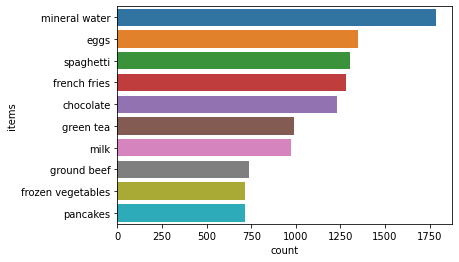

In [11]:
sns.barplot('count','items',data=pop_item)

### Apriori Algorithm 

In [12]:
# min_support -- Support Creterion = 0.04 = 4%
frequent_itemsets = apriori(df_clean, min_support=0.04, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.087200,(burgers)
1,0.081067,(cake)
2,0.046800,(champagne)
3,0.060000,(chicken)
4,0.163867,(chocolate)
5,0.080400,(cookies)
6,0.051067,(cooking oil)
7,0.179733,(eggs)
8,0.079333,(escalope)
9,0.170933,(french fries)


Inference: Total 35 item sets

In [13]:
# min_threshold -- Lift Ratio > 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506
1,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,0.013623,1.073398
2,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,0.008109,1.062957
3,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,0.008109,1.043286
4,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,0.017520,1.305576
5,(mineral water),(ground beef),0.238267,0.098267,0.040933,0.171796,1.748266,0.017520,1.088782
6,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,0.017121,1.209812
7,(mineral water),(milk),0.238267,0.129600,0.048000,0.201455,1.554436,0.017121,1.089982
8,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468
9,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,0.018243,1.102184


In [14]:
#Sorting The Rules.
rules.sort_values('lift',ascending = True)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,0.008109,1.062957
3,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,0.008109,1.043286
0,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506
1,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,0.013623,1.073398
9,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,0.018243,1.102184
8,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468
6,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,0.017121,1.209812
7,(mineral water),(milk),0.238267,0.129600,0.048000,0.201455,1.554436,0.017121,1.089982
4,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,0.017520,1.305576
5,(mineral water),(ground beef),0.238267,0.098267,0.040933,0.171796,1.748266,0.017520,1.088782


In [15]:
# Fetching Rules which have Lift ratio great then 1
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506
1,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,0.013623,1.073398
2,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,0.008109,1.062957
3,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,0.008109,1.043286
4,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,0.017520,1.305576
5,(mineral water),(ground beef),0.238267,0.098267,0.040933,0.171796,1.748266,0.017520,1.088782
6,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,0.017121,1.209812
7,(mineral water),(milk),0.238267,0.129600,0.048000,0.201455,1.554436,0.017121,1.089982
8,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468
9,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,0.018243,1.102184


Inference:
The most popular item / Frequently Brought item is mineral water followed by eggs and Spaghetti

if mineral water is brought then chocolate, eggs, ground beef are also brought with it

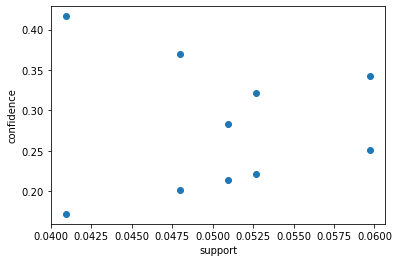

In [16]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()